In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [10]:
os.getcwd()


'/Users/gardar/Documents/UCL/ELEC0054 IMLS Research Project/04 Implementation/03 Hydraulic Simulations'

In [11]:
df = pd.read_csv('./studies/logs/l-town-chebnet-geneva_gpu-2.csv')

In [12]:
df

,Unnamed: 0,Unnamed: 0.1,trn_loss,val_loss,val_rel_err,val_rel_err_o,val_rel_err_h
0,0,0.0,0.019809,0.010712,0.095366,0.091974,0.095516
1,1,1.0,0.007462,0.005071,0.062807,0.066456,0.062646
2,2,2.0,0.004735,0.004239,0.054818,0.059245,0.054623
3,3,3.0,0.004174,0.003721,0.050081,0.052129,0.049991
4,4,4.0,0.003673,0.003038,0.044243,0.047129,0.044116
...,...,...,...,...,...,...,...
159,159,NaN,0.000104,0.000093,0.008999,0.008246,0.009032
160,160,NaN,0.000103,0.000087,0.008689,0.008099,0.008715
161,161,NaN,0.000102,0.000084,0.008504,0.007998,0.008527
162,162,NaN,0.000100,0.000083,0.008459,0.008009,0.008479


In [23]:
metrics = df[["trn_loss","val_loss","val_rel_err","val_rel_err_o","val_rel_err_h"]].copy()

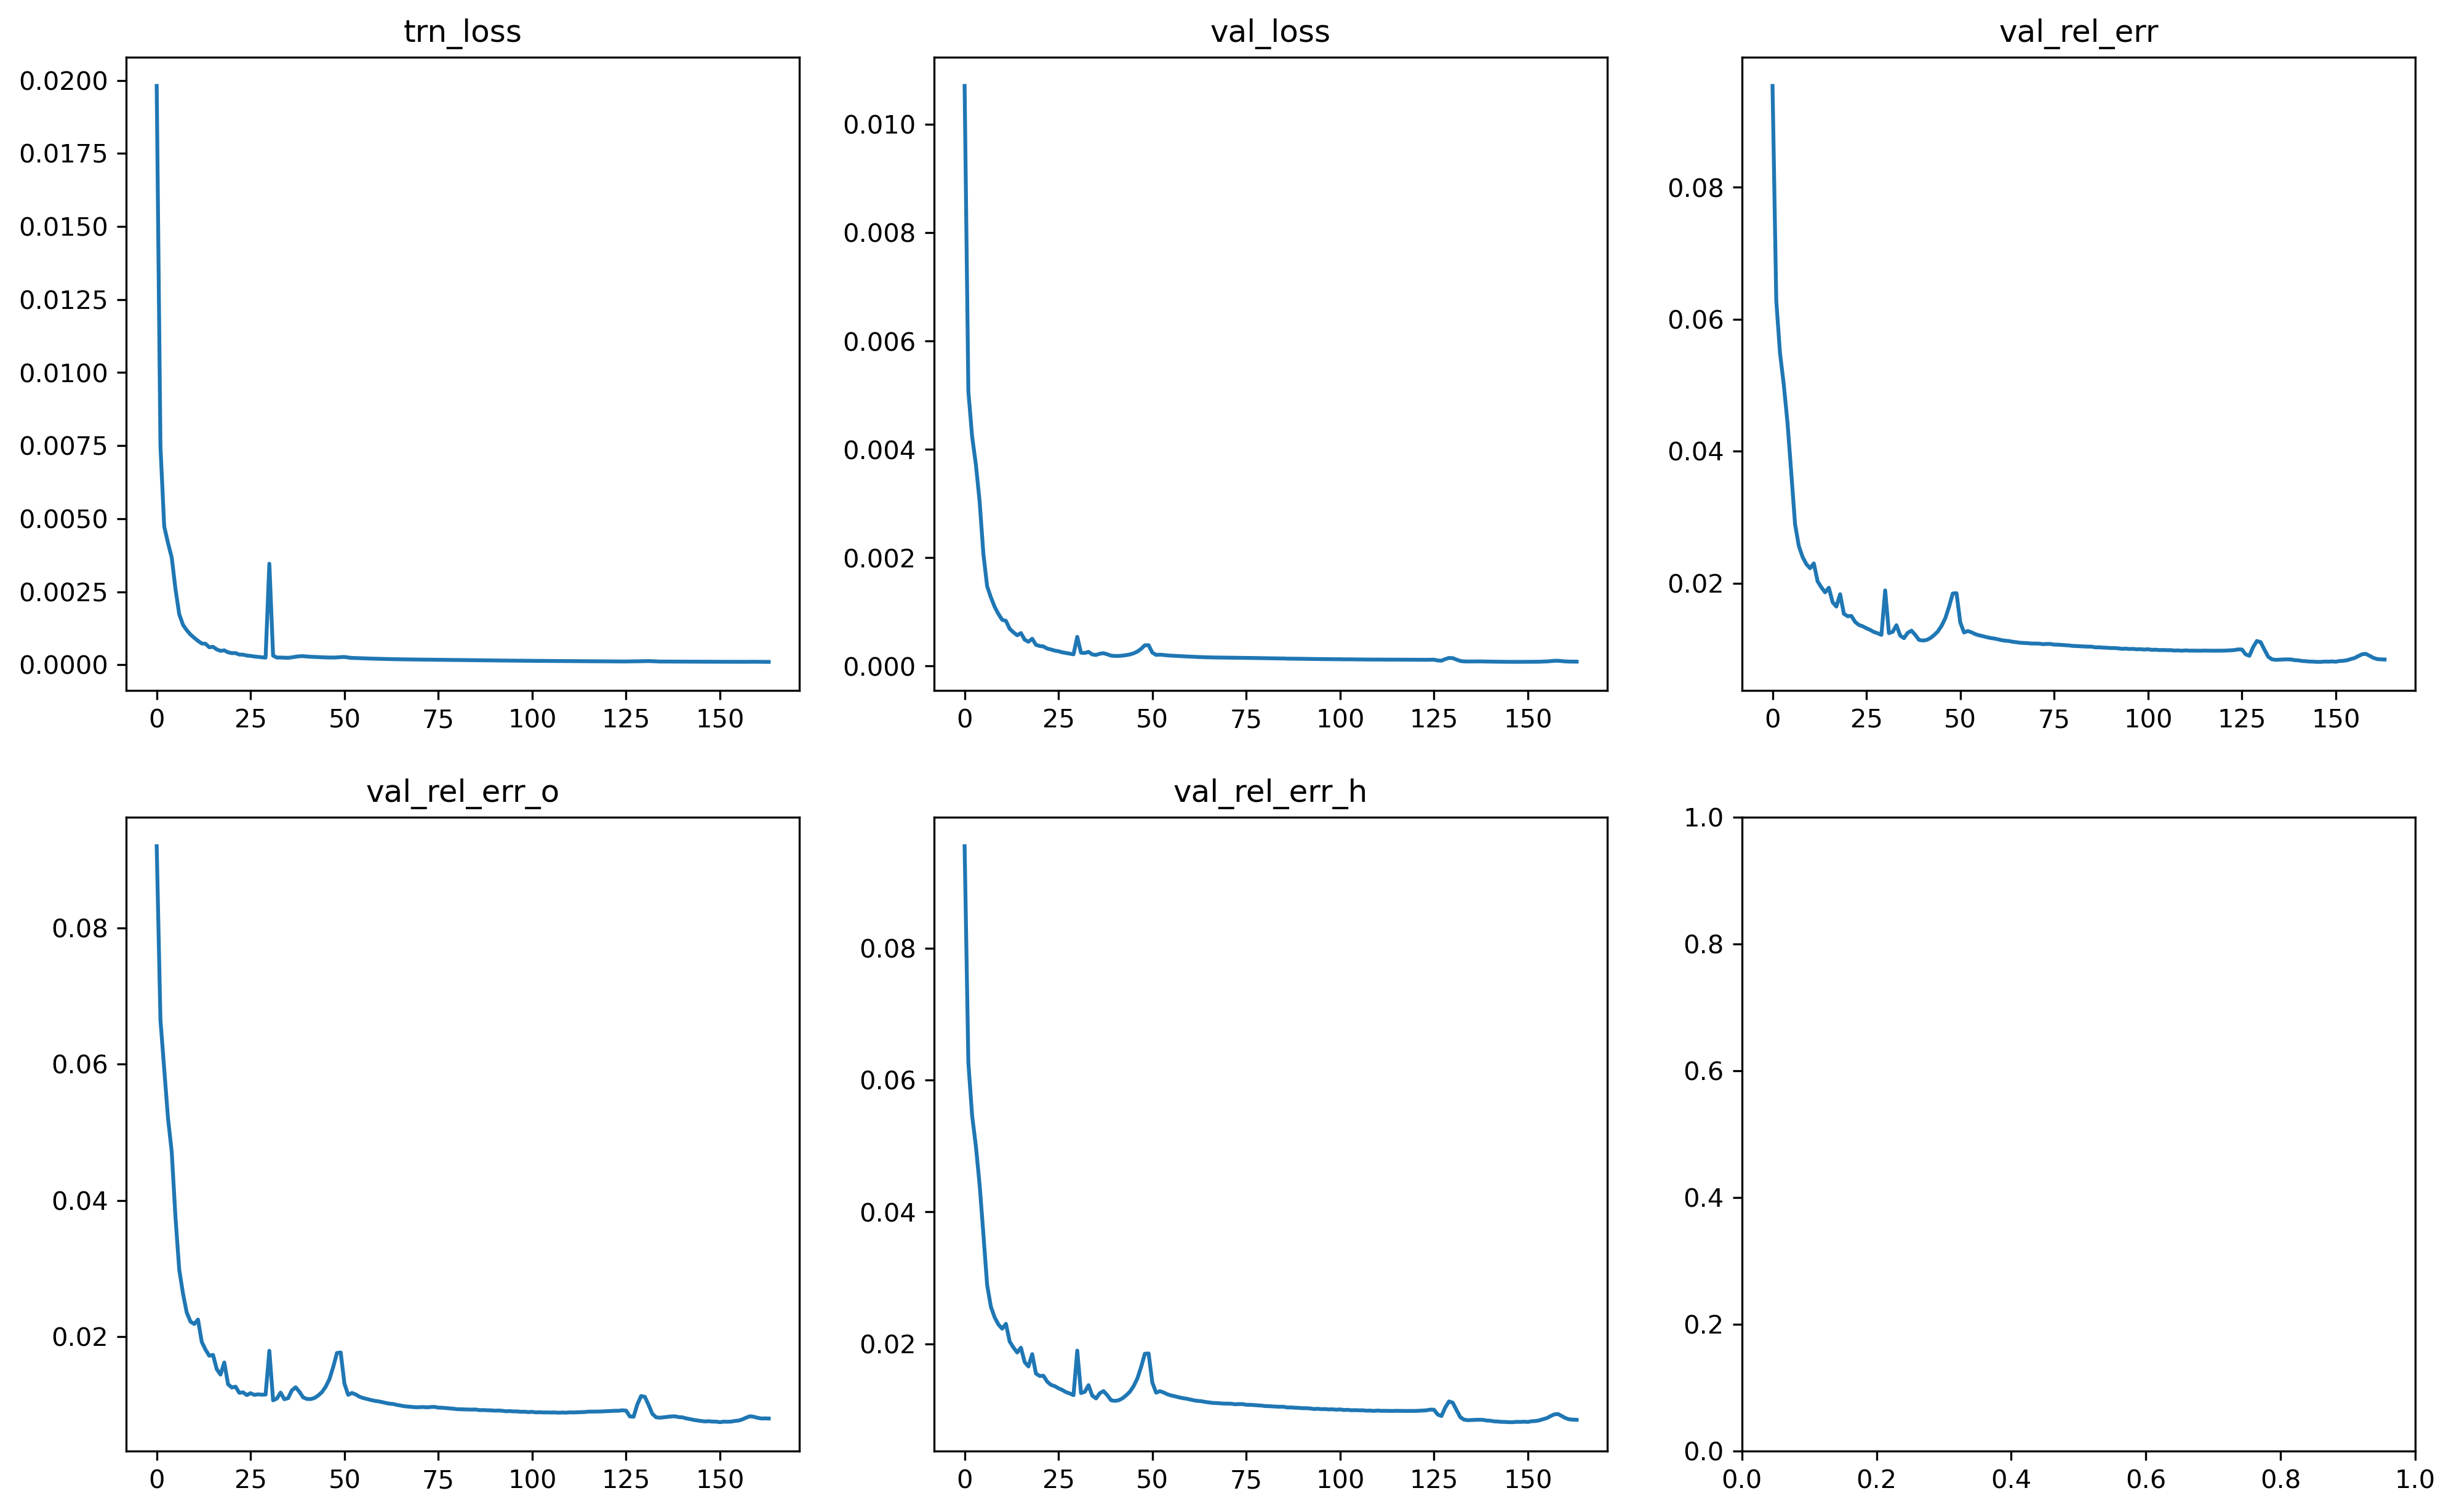

In [26]:
fig,ax = plt.subplots(nrows=2, ncols=3, figsize=(16,10), dpi=300)

for line,axis in zip(metrics.columns, ax.ravel()):
    axis.plot(metrics[line])
    axis.set_title(line)

<AxesSubplot:>

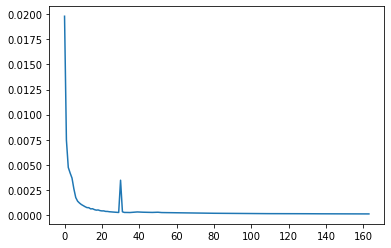

In [15]:
df['trn_loss'].plot()

In [ ]:
df['']